In [3]:
import pandas as pd
import requests
import time
from bs4 import BeautifulSoup

# ✅ 1. Load dataset
file_path = "C:/Users/bhavy/Downloads/data.csv"   # Change if needed
df = pd.read_csv(file_path)

# ✅ 2. Create empty lists to store results
titles = []
body_texts = []
word_counts = []

# ✅ 3. Define headers for HTTP requests
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

# ✅ 4. Function to extract clean text from HTML content
def extract_text_from_html(html_content):
    try:
        soup = BeautifulSoup(html_content, 'html.parser')

        # Extract title
        title = soup.title.string.strip() if soup.title else "N/A"

        # Extract paragraphs or main content areas
        body = ''
        for tag in soup.find_all(['p', 'article', 'main']):
            body += tag.get_text(separator=" ", strip=True) + " "

        # Clean body text
        body = body.strip()

        # Word count
        word_count = len(body.split())

        return title, body, word_count

    except Exception:
        return "N/A", "N/A", 0

# ✅ 5. Loop through all URLs and extract data
for index, row in df.iterrows():
    url = row['url']
    html_content = row.get('html_content', None)

    print(f"Processing: {url}")

    # Case 1: If HTML content exists → parse directly
    if pd.notna(html_content):
        title, body, word_count = extract_text_from_html(html_content)

    # Case 2: If HTML is missing → Scrape website
    else:
        try:
            response = requests.get(url, headers=headers, timeout=10)
            if response.status_code == 200:
                title, body, word_count = extract_text_from_html(response.text)
            else:
                title, body, word_count = "Error", "Failed to fetch page", 0
        except Exception:
            title, body, word_count = "Error", "Request failed", 0

        # Delay between requests (to avoid blocking)
        time.sleep(1.5)

    titles.append(title)
    body_texts.append(body)
    word_counts.append(word_count)

# ✅ 6. Store back to DataFrame
df['title'] = titles
df['body_text'] = body_texts
df['word_count'] = word_counts

# ✅ 7. Save output
output_path = "C:/Users/bhavy/Downloads/data/data.csv"  # Change if needed
df[['url', 'title', 'body_text', 'word_count']].to_csv(output_path, index=False)

print("\n✅ Done! File saved as:", output_path)


Processing: https://www.cm-alliance.com/cybersecurity-blog
Processing: https://www.varonis.com/blog/cybersecurity-tips
Processing: https://www.cisecurity.org/insights/blog/11-cyber-defense-tips-to-stay-secure-at-work-and-home
Processing: https://www.cisa.gov/topics/cybersecurity-best-practices
Processing: https://www.qnbtrust.bank/Resources/Learning-Center/Blog/7-cyber-security-tips
Processing: https://nordlayer.com/learn/network-security/basics/
Processing: https://www.fortinet.com/resources/cyberglossary/what-is-network-security
Processing: https://www.cisco.com/site/us/en/learn/topics/security/what-is-network-security.html
Processing: https://www.trendmicro.com/en_us/what-is/network-security/network-security-basics.html
Processing: https://digitdefence.com/blog/fundamentals-of-network-security-in-computer-networks
Processing: https://guardiandigital.com/resources/blog/guide-on-phishing
Processing: https://cofense.com/blog
Processing: https://www.connectwise.com/blog/phishing-prevent

In [9]:
!pip uninstall numpy -y
!pip install numpy==1.26.4

Found existing installation: numpy 2.3.4
Uninstalling numpy-2.3.4:
  Successfully uninstalled numpy-2.3.4


You can safely remove it manually.
You can safely remove it manually.


   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
   ---- ----------------------------------- 1.8/15.5 MB 10.1 MB/s eta 0:00:02
   ------ --------------------------------- 2.6/15.5 MB 6.3 MB/s eta 0:00:03
   --------- ------------------------------ 3.7/15.5 MB 6.1 MB/s eta 0:00:02
   ------------ --------------------------- 5.0/15.5 MB 6.3 MB/s eta 0:00:02
   ----------------- ---------------------- 6.8/15.5 MB 6.7 MB/s eta 0:00:02
   ---------------------- ----------------- 8.7/15.5 MB 7.2 MB/s eta 0:00:01
   --------------------------- ------------ 10.5/15.5 MB 7.4 MB/s eta 0:00:01
   -------------------------------- ------- 12.6/15.5 MB 7.8 MB/s eta 0:00:01
   ------------------------------------- -- 14.7/15.5 MB 8.0 MB/s eta 0:00:01
   ---------------------------------------- 15.5/15.5 MB 7.9 MB/s eta 0:00:00


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
!jupyter notebook

In [9]:

# !pip install pandas numpy nltk textstat scikit-learn sentence-transformers

import pandas as pd
import numpy as np
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import sent_tokenize
from textstat import flesch_reading_ease
from sentence_transformers import SentenceTransformer

# Download required NLTK resources (run once)
nltk.download('punkt')
nltk.download('punkt_tab')

# Load your extracted content CSV from Step 1 (Update path)
df = pd.read_csv("C:/Users/bhavy/Downloads/data/data.csv")

# ==============================
#  1. TEXT CLEANING FUNCTION
# ==============================
def clean_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()  # Lowercase
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    return text

df['clean_text'] = df['body_text'].apply(clean_text)

# ==============================
# 2. BASIC TEXT METRICS
# ==============================
df['word_count'] = df['clean_text'].apply(lambda x: len(x.split()))
df['sentence_count'] = df['clean_text'].apply(lambda x: len(sent_tokenize(x)))

# ==============================
# 3. READABILITY SCORE
# ==============================
df['readability'] = df['clean_text'].apply(lambda x: flesch_reading_ease(x) if x.strip() else None)

# ==============================
# 4. TF-IDF KEYWORDS (Top 5)
# ==============================
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf.fit_transform(df['clean_text'])
feature_names = tfidf.get_feature_names_out()

def get_top_keywords(row, top_n=5):
    row = row.toarray().flatten()
    top_indices = row.argsort()[-top_n:][::-1]
    return [feature_names[i] for i in top_indices if row[i] > 0]

df['top_keywords'] = [get_top_keywords(tfidf_matrix[i], 5) for i in range(tfidf_matrix.shape[0])]

# ==============================
# 5. EMBEDDINGS (For Duplicate Detection)
# ==============================
model = SentenceTransformer('all-MiniLM-L6-v2')
df['embeddings'] = df['clean_text'].apply(lambda x: model.encode(x).tolist())

# ==============================
# 6. SAVE FINAL FEATURE CSV
# ==============================
output_path = "C:/Users/bhavy/Downloads/data/featured.csv"
df[['url', 'title', 'clean_text', 'word_count', 'sentence_count', 'readability', 'top_keywords', 'embeddings']].to_csv(output_path, index=False)

print(" Feature Extraction Done! File saved at:", output_path)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bhavy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\bhavy\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

C:\Users\bhavy\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\bhavy\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

 Feature Extraction Done! File saved at: C:/Users/bhavy/Downloads/data/featured.csv


In [5]:
!pip install sentence-transformers

  Using cached sentence_transformers-5.1.2-py3-none-any.whl.metadata (16 kB)
Using cached sentence_transformers-5.1.2-py3-none-any.whl (488 kB)


In [5]:
# Top 5 pages with highest word count
df.nlargest(5, 'word_count')[['url', 'title', 'word_count']]

,url,title,word_count
71,https://en.wikipedia.org/wiki/Artificial_intel...,Artificial intelligence - Wikipedia,52125
53,https://sproutsocial.com/insights/social-media...,How to Build Your Social Media Marketing Strat...,30694
69,https://en.wikipedia.org/wiki/Machine_learning,Machine learning - Wikipedia,27979
9,https://digitdefence.com/blog/fundamentals-of-...,Fundamentals of Network Security in Computer N...,21386
34,https://www.akkio.com/beginners-guide-to-machi...,The Complete Beginner's Guide to Machine Learning,21292


In [49]:
print(df.columns)


Index(['url', 'title', 'clean_text', 'word_count', 'sentence_count',
       'readability', 'top_keywords', 'embeddings', 'is_thin', 'quality_label',
       'baseline_label'],
      dtype='object')


In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib

# ✅ Use the correct column for text content
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit TF-IDF on clean_text
tfidf_matrix = vectorizer.fit_transform(df['clean_text'].fillna(""))

# Save TF-IDF Vectorizer for Streamlit App
joblib.dump(vectorizer, "C:/Users/bhavy/Downloads/seo-content-detector/streamlit_app/model/vectorizer.pkl")
print("✅ vectorizer.pkl has been saved successfully!")


✅ vectorizer.pkl has been saved successfully!


In [13]:
import pandas as pd

df = pd.read_csv("C:/Users/bhavy/Downloads/data/featured.csv")
print(df.columns)


Index(['url', 'title', 'clean_text', 'word_count', 'sentence_count',
       'readability', 'top_keywords', 'embeddings'],
      dtype='object')


In [15]:
import pandas as pd

# Load the processed feature CSV
df = pd.read_csv("C:/Users/bhavy/Downloads/data/featured.csv")

# Rename columns to match expected output format
df.rename(columns={'readability': 'flesch_reading_ease', 'embeddings': 'embedding'}, inplace=True)

# Ensure embedding is stored as a string (not a list type)
df['embedding'] = df['embedding'].astype(str)

# Select and reorder columns exactly as required
output_df = df[['url', 'word_count', 'sentence_count', 'flesch_reading_ease', 'top_keywords', 'embedding']]

# Show first few rows
print(output_df.head())



                                                 url  word_count  \
0     https://www.cm-alliance.com/cybersecurity-blog         326   
1    https://www.varonis.com/blog/cybersecurity-tips        5460   
2  https://www.cisecurity.org/insights/blog/11-cy...        2011   
3  https://www.cisa.gov/topics/cybersecurity-best...        1438   
4  https://www.qnbtrust.bank/Resources/Learning-C...           4   

   sentence_count  flesch_reading_ease  \
0               6            -6.816181   
1             298            39.226772   
2             123            53.274400   
3              53             5.380514   
4               1           118.175000   

                                        top_keywords  \
0  ['cyber', 'alliance', 'cybersecurity', 'traini...   
1   ['varonis', 'data', 'security', 'access', 'app']   
2  ['password', 'passphrase', 'authentication', '...   
3  ['cisa', 'cybersecurity', 'cyber', 'practices'...   
4                        ['fetch', 'failed', 'page']   

 

In [21]:
!pip install wordcloud

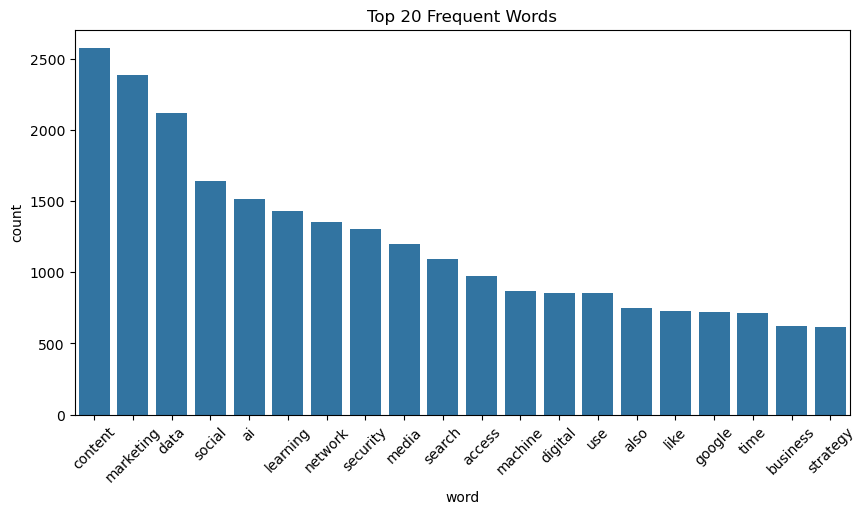

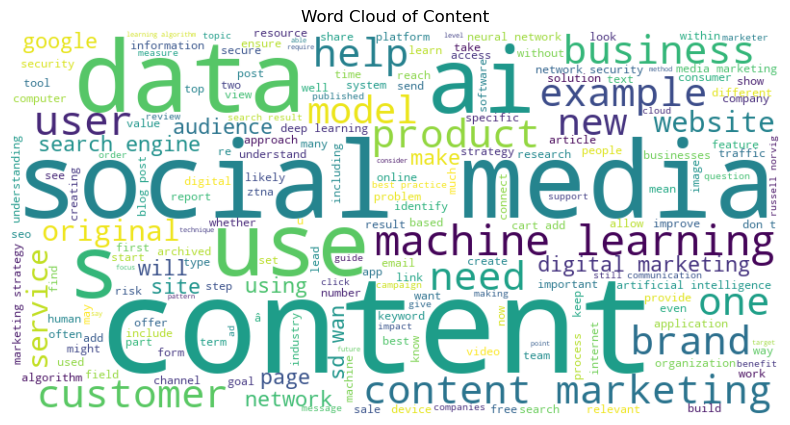

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

# Load your feature file
df = pd.read_csv("C:/Users/bhavy/Downloads/data/featured.csv")

# ✅ Fix NaN values in clean_text
df['clean_text'] = df['clean_text'].fillna("")

# ✅ Word Frequency Analysis
stop_words = stopwords.words('english')
vectorizer = CountVectorizer(stop_words=stop_words, max_features=20)
word_matrix = vectorizer.fit_transform(df['clean_text']).toarray()

# Summing word frequencies
word_counts = word_matrix.sum(axis=0)
words_df = pd.DataFrame({
    "word": vectorizer.get_feature_names_out(),
    "count": word_counts
}).sort_values(by="count", ascending=False)

# ✅ Plot Top 20 Words
plt.figure(figsize=(10,5))
sns.barplot(x=words_df['word'], y=words_df['count'])
plt.xticks(rotation=45)
plt.title("Top 20 Frequent Words")
plt.show()

# ✅ WordCloud
text = " ".join(df['clean_text'])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Content")
plt.show()


In [27]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER lexicon
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis
df['sentiment_score'] = df['clean_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Show results
print(df[['url', 'sentiment_score']].head())


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\bhavy\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                                 url  sentiment_score
0     https://www.cm-alliance.com/cybersecurity-blog           0.9849
1    https://www.varonis.com/blog/cybersecurity-tips           0.9999
2  https://www.cisecurity.org/insights/blog/11-cy...           0.9987
3  https://www.cisa.gov/topics/cybersecurity-best...           0.9993
4  https://www.qnbtrust.bank/Resources/Learning-C...          -0.5106


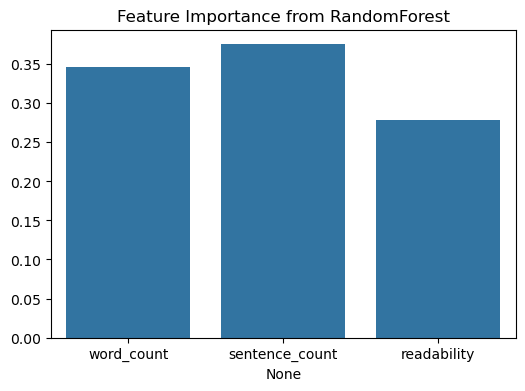

In [29]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Example features & dummy target (replace this with your real labels)
features = df[['word_count', 'sentence_count', 'readability']]
target = [1 if x > 0 else 0 for x in df['sentiment_score']]  # dummy target

# Train model
rf_model = RandomForestClassifier()
rf_model.fit(features, target)

# Feature Importance
importance = rf_model.feature_importances_

plt.figure(figsize=(6, 4))
sns.barplot(x=features.columns, y=importance)
plt.title("Feature Importance from RandomForest")
plt.show()


In [31]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Load your feature CSV
df = pd.read_csv("C:/Users/bhavy/Downloads/data/featured.csv")

# Ensure text or embeddings are available
# If embeddings are stored as string → convert to list of floats
import ast
df['embeddings'] = df['embeddings'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Compute Cosine Similarity Matrix using embeddings
similarity_matrix = cosine_similarity(list(df['embeddings']))

# Set similarity threshold
threshold = 0.80
duplicate_pairs = []

# Find all duplicate pairs (i < j to avoid duplicates & self-comparison)
for i in range(len(similarity_matrix)):
    for j in range(i+1, len(similarity_matrix)):
        if similarity_matrix[i][j] > threshold:
            duplicate_pairs.append({
                'url1': df['url'][i],
                'url2': df['url'][j],
                'similarity': round(similarity_matrix[i][j], 3)
            })

# Save duplicate pairs to CSV
duplicate_df = pd.DataFrame(duplicate_pairs)
duplicate_df.to_csv("C:/Users/bhavy/Downloads/data/duplicate_pages.csv", index=False)

print("✅ Duplicate Detection Completed!")
print(duplicate_df.head() if not duplicate_df.empty else "No duplicates found.")


✅ Duplicate Detection Completed!
                                                url1  \
0  https://www.qnbtrust.bank/Resources/Learning-C...   
1  https://www.qnbtrust.bank/Resources/Learning-C...   
2  https://www.qnbtrust.bank/Resources/Learning-C...   
3  https://www.qnbtrust.bank/Resources/Learning-C...   
4  https://www.qnbtrust.bank/Resources/Learning-C...   

                                                url2  similarity  
0  https://support.microsoft.com/en-us/windows/ho...         1.0  
1  https://www.cloudflare.com/learning/access-man...         1.0  
2  https://towardsdatascience.com/machine-learnin...         1.0  
3  https://www.analyticsvidhya.com/blog/2021/09/c...         1.0  
4       https://www.investopedia.com/terms/s/seo.asp         1.0  


In [33]:
# Create binary column for thin content
df['is_thin'] = df['word_count'].apply(lambda x: 1 if x < 500 else 0)

# Save updated dataset
df.to_csv("C:/Users/bhavy/Downloads/data/featured_with_thin.csv", index=False)
print("✅ Thin Content Flagging Completed!")


✅ Thin Content Flagging Completed!


In [35]:
total_pages = len(df)
total_duplicates = len(duplicate_pairs)
thin_pages = df['is_thin'].sum()
thin_percentage = round((thin_pages / total_pages) * 100, 2)

print("\n📊 SUMMARY REPORT")
print(f"Total pages analyzed: {total_pages}")
print(f"Duplicate pairs found: {total_duplicates}")
print(f"Thin content pages: {thin_pages} ({thin_percentage}%)")

if total_duplicates > 0:
    print("\nSample Duplicate Pairs:")
    print(duplicate_df.head())
else:
    print("No duplicate content detected above threshold.")



📊 SUMMARY REPORT
Total pages analyzed: 81
Duplicate pairs found: 58
Thin content pages: 25 (30.86%)

Sample Duplicate Pairs:
                                                url1  \
0  https://www.qnbtrust.bank/Resources/Learning-C...   
1  https://www.qnbtrust.bank/Resources/Learning-C...   
2  https://www.qnbtrust.bank/Resources/Learning-C...   
3  https://www.qnbtrust.bank/Resources/Learning-C...   
4  https://www.qnbtrust.bank/Resources/Learning-C...   

                                                url2  similarity  
0  https://support.microsoft.com/en-us/windows/ho...         1.0  
1  https://www.cloudflare.com/learning/access-man...         1.0  
2  https://towardsdatascience.com/machine-learnin...         1.0  
3  https://www.analyticsvidhya.com/blog/2021/09/c...         1.0  
4       https://www.investopedia.com/terms/s/seo.asp         1.0  


✅ Quality Labels Added! Sample:
                                                 url  word_count  readability  \
0     https://www.cm-alliance.com/cybersecurity-blog         326    -6.816181   
1    https://www.varonis.com/blog/cybersecurity-tips        5460    39.226772   
2  https://www.cisecurity.org/insights/blog/11-cy...        2011    53.274400   
3  https://www.cisa.gov/topics/cybersecurity-best...        1438     5.380514   
4  https://www.qnbtrust.bank/Resources/Learning-C...           4   118.175000   

  quality_label  
0           Low  
1        Medium  
2          High  
3           Low  
4           Low  

📊 Model Performance Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00         3
         Low       0.93      1.00      0.96        13
      Medium       1.00      0.89      0.94         9

    accuracy                           0.96        25
   macro avg       0.98      0.96      0.97        25
weighted avg      

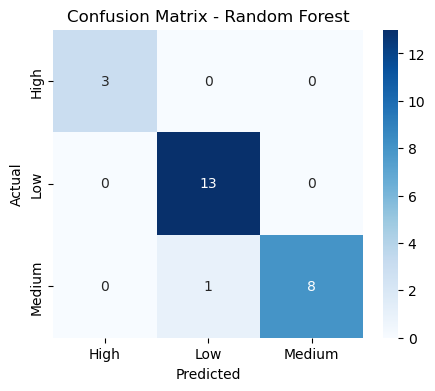


✅ Baseline Accuracy (Word Count only): 0.49

🌟 Top Features for Model:
          Feature  Importance
2     readability    0.413197
0      word_count    0.316486
1  sentence_count    0.270317

✅ Quality Scoring Completed and saved to CSV!


In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load your feature dataset
df = pd.read_csv("C:/Users/bhavy/Downloads/data/featured_with_thin.csv")

# ✅ Step 1: Create Synthetic Quality Labels
def assign_quality(row):
    if row['word_count'] > 1500 and 50 <= row['readability'] <= 70:
        return "High"
    elif row['word_count'] < 500 or row['readability'] < 30:
        return "Low"
    else:
        return "Medium"

df['quality_label'] = df.apply(assign_quality, axis=1)

print("✅ Quality Labels Added! Sample:")
print(df[['url', 'word_count', 'readability', 'quality_label']].head())

# ✅ Step 2: Select Features
features = ['word_count', 'sentence_count', 'readability']
X = df[features]
y = df['quality_label']

# ✅ Step 3: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# ✅ Step 4: Train Machine Learning Model (Random Forest)
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# ✅ Step 5: Predictions
y_pred = model.predict(X_test)

# ✅ Step 6: Evaluation Metrics
print("\n📊 Model Performance Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# ✅ Confusion Matrix Plot
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ✅ Step 7: Baseline Model (Word Count Only)
df['baseline_label'] = df['word_count'].apply(lambda x: "High" if x > 1500 else ("Low" if x < 500 else "Medium"))

baseline_accuracy = accuracy_score(y, df['baseline_label'])
print(f"\n✅ Baseline Accuracy (Word Count only): {baseline_accuracy:.2f}")

# ✅ Step 8: Feature Importance
feature_importance = pd.DataFrame({
    "Feature": features,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\n🌟 Top Features for Model:")
print(feature_importance)

# ✅ Optional: Save results
df.to_csv("C:/Users/bhavy/Downloads/data/quality_scored.csv", index=False)
feature_importance.to_csv("C:/Users/bhavy/Downloads/data/top_features.csv", index=False)

print("\n✅ Quality Scoring Completed and saved to CSV!")


In [43]:
# analyze_url function for Jupyter
import requests
from bs4 import BeautifulSoup
import time
import re
import ast
import math
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# try to import sentence-transformers, fallback to TF-IDF
try:
    from sentence_transformers import SentenceTransformer
    S2_AVAILABLE = True
except Exception:
    S2_AVAILABLE = False
    from sklearn.feature_extraction.text import TfidfVectorizer

# text utilities
import nltk
from nltk.tokenize import sent_tokenize
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

from textstat import flesch_reading_ease

# Constants — edit path if needed
FEATURE_CSV_PATH = r"C:/Users/bhavy/Downloads/data/featured.csv"  # path to your features file
SIMILARITY_THRESHOLD = 0.70   # reporting threshold for similarity matches
REQUEST_TIMEOUT = 10
USER_AGENT = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"

# Load existing feature dataset and prepare embeddings / fallback vectorizer
_df = pd.read_csv(FEATURE_CSV_PATH)
_df['clean_text'] = _df['clean_text'].fillna("")

# Normalize column names if different
if 'readability' not in _df.columns and 'flesch_reading_ease' in _df.columns:
    _df.rename(columns={'flesch_reading_ease': 'readability'}, inplace=True)

# parse embeddings column if saved as string
def _parse_embeddings_cell(x):
    if pd.isna(x):
        return None
    if isinstance(x, str):
        try:
            return np.array(ast.literal_eval(x))
        except Exception:
            # try simple parsing of bracketed floats
            try:
                s = x.strip()
                s = s.strip('[]')
                arr = [float(v) for v in s.split(',') if v.strip()]
                return np.array(arr)
            except Exception:
                return None
    elif isinstance(x, (list, np.ndarray)):
        return np.array(x)
    return None

_df['parsed_embeddings'] = _df['embeddings'].apply(_parse_embeddings_cell)

# Decide whether we have usable sentence-transformer embeddings in dataset
_have_vector_embeddings = all(_df['parsed_embeddings'].apply(lambda x: isinstance(x, np.ndarray)))
# If sentence-transformers available, init model
if S2_AVAILABLE:
    s2_model = SentenceTransformer('all-MiniLM-L6-v2')
else:
    # fallback: build TF-IDF vectorizer on existing clean_text
    tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
    tfidf_matrix_existing = tfidf_vectorizer.fit_transform(_df['clean_text'])

# If dataset embeddings exist but sentence-transformers not installed, we may still compare using existing embeddings.
if _have_vector_embeddings:
    existing_embs = np.vstack([e for e in _df['parsed_embeddings']])
else:
    existing_embs = None  # use TF-IDF fallback

# Helper: scrape page and extract main text
def _scrape_page(url):
    headers = {"User-Agent": USER_AGENT}
    try:
        resp = requests.get(url, headers=headers, timeout=REQUEST_TIMEOUT)
        resp.raise_for_status()
        html = resp.text
    except Exception as e:
        return {"error": f"Request failed: {e}"}
    # polite short delay
    time.sleep(1.0)
    soup = BeautifulSoup(html, 'html.parser')
    # title
    title_tag = soup.title.string.strip() if soup.title and soup.title.string else ""
    # choose main content heuristically
    body_text = ""
    # try article/main first
    for selector in ['article', 'main']:
        sel = soup.find(selector)
        if sel:
            body_text = ' '.join([p.get_text(" ", strip=True) for p in sel.find_all('p')])
            if len(body_text) > 50:
                break
    # fallback to collecting <p> from whole page
    if not body_text:
        paragraphs = soup.find_all('p')
        body_text = ' '.join(p.get_text(" ", strip=True) for p in paragraphs)
    # final cleanup
    body_text = re.sub(r'\s+', ' ', body_text).strip()
    return {"title": title_tag, "body_text": body_text}

# Helper: clean text
def _clean_text(text):
    if text is None:
        return ""
    text = str(text).lower()
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Synthetic quality rules (same as earlier)
def _assign_quality(word_count, readability):
    try:
        if word_count > 1500 and (50 <= readability <= 70):
            return "High"
        elif word_count < 500 or (readability is not None and readability < 30):
            return "Low"
        else:
            return "Medium"
    except Exception:
        return "Medium"

# Main function
def analyze_url(url, similarity_threshold=SIMILARITY_THRESHOLD, top_k_matches=5):
    """
    Scrapes URL, extracts features, computes quality_label and finds similar pages from your dataset.
    Returns dict ready for json.dumps().
    """
    # 1) Scrape page
    scraped = _scrape_page(url)
    if 'error' in scraped:
        return {"url": url, "error": scraped['error']}
    title = scraped.get('title', "")
    body = scraped.get('body_text', "")
    clean = _clean_text(body)
    # 2) compute basic features
    word_count = len(clean.split()) if clean else 0
    sentence_count = len(sent_tokenize(clean)) if clean else 0
    try:
        readability = flesch_reading_ease(clean) if clean else None
    except Exception:
        readability = None
    is_thin = bool(word_count < 500)
    # 3) embedding for the scraped text
    new_emb = None
    using_emb_method = None
    if S2_AVAILABLE:
        try:
            new_emb = s2_model.encode([clean])[0]
            using_emb_method = "sentence-transformer"
        except Exception:
            new_emb = None
    if new_emb is None:
        # fallback to TF-IDF vectors (ensure we have vectorizer)
        if 'tfidf_vectorizer' not in globals():
            # train vectorizer on existing dataset
            tfidf_vectorizer_local = TfidfVectorizer(stop_words='english', max_features=5000)
            tfidf_matrix_local = tfidf_vectorizer_local.fit_transform(_df['clean_text'])
            globals()['tfidf_vectorizer'] = tfidf_vectorizer_local
            globals()['tfidf_matrix_existing_local'] = tfidf_matrix_local
        vec = globals()['tfidf_vectorizer'].transform([clean])
        new_emb = vec.toarray()[0]
        using_emb_method = "tfidf"
    # 4) compute similarities to existing records
    similar_to = []
    try:
        if existing_embs is not None and new_emb is not None and using_emb_method == "sentence-transformer":
            # normalize (cosine via dot product)
            from sklearn.preprocessing import normalize
            ne = new_emb.reshape(1, -1)
            all_norm = normalize(existing_embs)
            ne_norm = normalize(ne)
            sims = (all_norm @ ne_norm.T).flatten()
        else:
            # ensure existing TF-IDF matrix is available
            if 'tfidf_matrix_existing' in globals():
                sims = cosine_similarity(globals()['tfidf_matrix_existing'], new_emb.reshape(1, -1)).flatten()
            elif 'tfidf_matrix_existing_local' in globals():
                sims = cosine_similarity(globals()['tfidf_matrix_existing_local'], new_emb.reshape(1, -1)).flatten()
            else:
                # try building one now
                try:
                    tmp_vec = TfidfVectorizer(stop_words='english', max_features=5000)
                    tmp_mat = tmp_vec.fit_transform(_df['clean_text'])
                    sims = cosine_similarity(tmp_mat, new_emb.reshape(1, -1)).flatten()
                except Exception:
                    sims = np.array([])
        # collect top matches above threshold
        if sims.size > 0:
            idxs = np.where(sims >= similarity_threshold)[0]
            # sort matched indices by similarity desc
            ranked = sorted([(i, float(sims[i])) for i in idxs], key=lambda x: x[1], reverse=True)
            for i, s in ranked[:top_k_matches]:
                similar_to.append({"url": _df.loc[i, 'url'], "similarity": round(float(s), 3)})
    except Exception as e:
        # if similarity fails, just return empty matches
        similar_to = []
    # 5) assign quality label
    quality_label = _assign_quality(word_count, readability if readability is not None else -9999)
    # 6) prepare result
    result = {
        "url": url,
        "title": title,
        "word_count": int(word_count),
        "sentence_count": int(sentence_count),
        "readability": float(readability) if readability is not None else None,
        "quality_label": quality_label,
        "is_thin": bool(is_thin),
        "similar_to": similar_to,
        "embedding_method": using_emb_method
    }
    return result

# Example usage (uncomment and set a real URL to test)
# res = analyze_url("https://example.com/test-article")
# import json
# print(json.dumps(res, indent=2))


In [45]:
import pickle

# Assuming your trained model is called 'model'
with open("C:/Users/bhavy/Downloads/seo-content-detector/model/quality_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("✅ Model saved successfully!")


✅ Model saved successfully!


In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
import pickle

# ✅ Step 1: Load Data
df = pd.read_csv("C:/Users/bhavy/Downloads/seo-content-detector/data/featured_with_thin.csv")

# Ensure body_text exists
df = df.dropna(subset=['body_text'])

# ✅ Step 2: Generate Synthetic Quality Label
def assign_quality(row):
    if row['word_count'] > 1500 and 50 <= row['readability'] <= 70:
        return "High"
    elif row['word_count'] < 500 or row['readability'] < 30:
        return "Low"
    else:
        return "Medium"

df['quality_label'] = df.apply(assign_quality, axis=1)

# ✅ Step 3: Vectorize Text using TF-IDF
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf.fit_transform(df['body_text'])
y = df['quality_label']

# ✅ Step 4: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ✅ Step 5: Train Random Forest Model
model = RandomForestClassifier(n_estimators=300, random_state=42)
model.fit(X_train, y_train)

# ✅ Step 6: Evaluate Model
y_pred = model.predict(X_test)
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

# ✅ Step 7: Save Model & Vectorizer
pickle.dump(model, open("quality_model.pkl", "wb"))
pickle.dump(tfidf, open("tfidf_vectorizer.pkl", "wb"))

print("\n✅ Model and Vectorizer Saved Successfully!")


KeyError: ['body_text']

In [65]:
import pandas as pd

df = pd.read_csv("C:/Users/bhavy/Downloads/seo-content-detector/data/featured_with_thin.csv")

# ✅ Find correct text column automatically
text_columns = ['body_text', 'content', 'text', 'clean_text', 'body', 'html_content']
text_col = None

for col in text_columns:
    if col in df.columns:
        text_col = col
        break

if text_col is None:
    raise ValueError("❌ No text content column found like body_text/content/text")

print(f"✅ Using text column: {text_col}")

# ✅ Continue safely
df = df.dropna(subset=[text_col])


✅ Using text column: clean_text
